<h1 style='text-align: center'> Termodinâmica Avançada - Desafio 3 <br> Ilum - Escola de Ciência </h1>

<h3> Professor Amauri Jardim de Paula </h3>

<h2> Introdução </h2>

<p style='text-align: justify'> Dando continuidade a solução do problema, o quarto desafio deste trabalho envolve obter a operação do Ciclo de Rankine pela energia de combustão que obtivemos no Desafio 3, calculado pela variação da energia livre de Gibbs. Para podermos trabalhar nesse ponto, devemos utilizar condições de funcionamento do Ciclo de Rankine para um caso ideal, calculando a eficiência do ciclo por valores de entalpia para água em estado de vapor. Além disso consideraremos outro tipo de ciclo, o qual se encaixa no modelo de Carnot, comparando a eficiência entre os dois ciclos de maneira teórica. </p>

<p style='text-align: justify'> Utilizando como referência o capítulo 4 do livro <a href='An Introduction to Thermal Physics by Daniel V. Schroeder (z-lib.org).pdf'>"An Introduction to Thermal Physics"</a>, de Daniel Schroeder, podemos, aqui, discutir sobre o comportamento de máquinas térmicas. </p>

<hr>

## Análise do Problema

<h2> O que é o Ciclo de Rankine? </h2>

<p style='text-align: justify'> O ciclo de vapor de Rankine é um processo termodinâmico que converte calor em trabalho, podendo ser reversível ou não. Esse calor é fornecido por uma fonte externa, operando a partir de um fluido dentro de uma caldeira, sendo assim um tipo de motor movido a vapor, que é expandido por uma turbina que produz trabalho. Essa propriedade termodinâmica de vapor foi difundida no século 19 pelo físico escocês William Johnson M. Rankine, que estudava essas propriedades de forma que o ciclo pudesse ser esquematizado em um diagrama que descreve, graficamente, o processo de conversão. </p>

<p style='text-align: justify'> Esse diagrama pode ser gerado em função das variações de temperatura e de entropia do sistema. A partir dele, podemos claramente ver 4 estágios de processos, indo de um ponto a outro de meneira cíclica. Abaixo temos descritos os processos de um ciclo ideal: </p>

<ul>
    <li> Processo 1-2: compressão isentrópica </li>
    <li> Processo 2-3: adição de calor a pressão constante na caldeira </li>
    <li> Processo 3-4: expansão isentrópica </li>
    <li> Processo 4-1: rejeição de calor a pressão constante no condensador </li>
</ul>

<p style='text-align: justify'> Em um ciclo ideal, a bomba e a turbina do motor não geram entropia, por isso os processos de compressão e expansão são isentrópicos, o que significa que esses processos são demonstrados como linhas verticais no diagrama de temperatura por entropia. </p>

<p style='text-align: justify'> Desta forma, demonstramos a seguir o diagrama do ciclo de Rankine ideal usando dados tabelados para água. Porém, antes de chegarmos lá, precisamos passar por um processo de calcular a eficiência do nosso ciclo através dos dados tabelados que obtivemos do National Institute of Standards and Technology <a href='https://webbook.nist.gov/chemistry/name-ser/'> [2] </a>.</p>

## Imports e Constantes

<p style='text-align: justify'> Comecemos por importar bibliotecas necessárias para o nosso cálculo, bem como as constantes para definir as cores representação que teremos em nosso diagrama de Temperatura por Entropia. </p>

<b> </b>

In [1]:
import matplotlib.pyplot as plt
from scipy.integrate import simpson
from numpy import diff, sqrt
import pandas as pd

entropy_color = '#eaed1f'        # amarelo
cycle_color = '#ff1900'          # vermelho
eff_color = '#298514'            # verde 
max_eff_color = '#020fc9'        # azul
eff_alcancada_color = '#ff1900'  # vermelho

## Lendo os Dados

<p style='text-align: justify'> Após os imports, vamos definir o DataFrame com o qual vamos trabalhar, uma vez que temos os dados tabelados presentes no arquivo de texto chamado 'fluid_precise.txt', o qual foi retirado do <a href='https://webbook.nist.gov/chemistry/name-ser/'> Chemistry WebBook </a>, do NIST, em um banco de dados sobre propriedades termodinâmicas de sistemas fluidos <a href='https://webbook.nist.gov/chemistry/fluid/'> [3] </a>. </p>

<p style='text-align: justify'> Entretanto, como não necessitamos de todas as informações contidas nesse DataFrame, um novo foi criado selecionando apenas as colunas relevantes, chamado 'df'. Além disso, define-se a coluna 'Temperature (K)' como índice e cada coluna do DataFrame df é convertida para valores numéricos. </p>

<b> </b>

In [2]:
df_old = pd.read_csv('fluid_precise.txt', sep='\t')
df = df_old[
    [
        'Temperature (K)',
        'Entropy (l, J/mol*K)',
        'Entropy (v, J/mol*K)',
        'Enthalpy (l, kJ/mol)',
        'Enthalpy (v, kJ/mol)',
        'Cv (l, J/mol*K)',
        'Cp (l, J/mol*K)',
        'Cv (v, J/mol*K)',
        'Cp (v, J/mol*K)'
    ]
].copy().set_index('Temperature (K)').drop(647.096000)
df.index = pd.to_numeric(df.index)

for col in df:
    df[col] = pd.to_numeric(df[col])

df

,"Entropy (l, J/mol*K)","Entropy (v, J/mol*K)","Enthalpy (l, kJ/mol)","Enthalpy (v, kJ/mol)","Cv (l, J/mol*K)","Cp (l, J/mol*K)","Cv (v, J/mol*K)","Cp (v, J/mol*K)"
Temperature (K),,,,,,,,
273.160000,-5.316945e-12,164.938667,0.000011,45.054657,75.978165,76.022837,25.552562,33.947107
273.783227,1.732082e-01,164.638636,0.047379,45.075255,75.953412,75.984753,25.561846,33.958238
274.406453,3.459380e-01,164.340344,0.094724,45.095847,75.927912,75.948422,25.571176,33.969442
275.029680,5.181954e-01,164.043777,0.142047,45.116435,75.901686,75.913760,25.580552,33.980717
275.652907,6.899863e-01,163.748922,0.189348,45.137018,75.874755,75.880687,25.589972,33.992061
...,...,...,...,...,...,...,...,...
643.979867,7.450496e+01,85.868579,34.353853,41.671794,71.179252,1053.505736,84.192176,2241.669299
644.603093,7.488735e+01,85.326484,34.606801,41.335899,73.282951,1365.658336,86.026110,2854.610738
645.226320,7.533692e+01,84.695283,34.903525,40.941788,76.329448,1931.977935,88.388936,3902.176286


## Calculando a temperatura máxima de aquecimento do sistema

<p style='text-align: justify'> Diante disso, usando os dados tabelados do nosso DataFrame `df`, fizemos os nossos cálculos necessárioa para obtermos a eficiência do ciclo de Rankine para o nosso sistema de fluidos, tanto para a Acetona quanto para o Etanol. </p>

<p style='text-align: justify'> As funções a seguir trabalham em conjunto para calcular a temperatura máxima alcançável em um sistema de aquecimento de água através da queima dos nossos combustíveis combustíveis, Acetona e Etanol. </p>

<b> </b>

In [3]:
# Conversão de gramas para mol para Acetona, Etanol e Água
def g_mol(g, com):
    """Recebe uma quantidade em gramas e o nome de um composto e converte para mol.
    
    Args:
        g: a massa do composto, em gramas.
        com: o nome do composto. Ele é usado para determinar o fator de conversão correto de gramas para mol
    
    Returns:
        A quantidade em mol do composto especificado
    """
    assert com.lower() in ['acetona', 'etanol', 'acetone', 'ethanol', 'agua', 'água', 'water'], 'Composto inválido! Deve ser Acetona, Etanol ou Água (pt/en)'
    
    if com.lower() in ['acetona', 'acetone']: return g / 58.08
    elif com.lower() in ['etanol', 'ethanol']: return g / 46.08
    else: return g / 18.01528

# Energia liberada na combustão de água ou etanol
def energia_comb(g, com):
    """ Recebe uma quantidade em gramas e o nome de um composto e calcula a energia liberada na combustão desse composto.
    
    Args:
        g: a massa do composto, em gramas.
        com: o nome do composto. Ele é usado para determinar o fator de conversão correto de gramas para mol
        
    Returns:
        A energia liberada em joules.
    """
    mol = g_mol(g, com)
    
    if com.lower() in ['acetona', 'acetone']: return mol * 1784478.96825
    else: return mol * 1358712.406875

# Pega a temperatura mais próxima da passada no dataframe (auxiliar par loops)
def get_closest_temp(temp_to_know):
    """ Uma temperatura em Kelvin e retorna a temperatura mais próxima dessa no DataFrame.
    
    Args:
        temp_to_know: a temperatura (em Kelvin) para a qual se deseja encontrar o valor mais próximo no índice do DataFrame.
    
    Returns:
        A temperatura correspondente ao índice que correspondente à menor diferença absoluta calculada entre cada valor no índice e o valor de temperatura fornecido.
    """
    line = abs(df.index-temp_to_know).argsort()[:1]
    closest_df = df.iloc[line].index 
    return list(closest_df)[0]

# Energia necessária para aumentar uma quantidade de gramas de água de uma t_inicial a uma t_final
def check_energia_aumentar_t_liquido(m_agua, tf, t0):
    """ Obterm as temperaturas mais próximas das recebidas no DataFrame, pega os valores de Cv correspondentes e utiliza a função simpson do 'scipy' 
        para intergrar a o cálculo da multiplicação entre as temperaturas e os calores específicos (Cv).
    
    Args:
        m_agua: a massa de água (em gramas) presente no sistema.
        tf: a temperatura (em Kelvin) final para a qual se deseja aumentar a temperatura do líquido.
        t0: a temperatura (em Kelvin) inicial do líquido.
    
    Returns:
        A energia necessária em joules para elevar a temperatura da água.
    """
    tf = get_closest_temp(tf)
    t0 = get_closest_temp(t0)
    mol_agua = g_mol(m_agua, 'agua')
    
    selecionadas = (t0 <= df.index) & (df.index <= tf)
    calores = df.iloc[selecionadas]['Cv (l, J/mol*K)'].values
    temps = df.iloc[selecionadas].index.values
    return mol_agua * simpson(calores * temps)

# Energia necessária para evaporar uma quantidade de gramas de água a determinada temperatura
def check_energia_evap(m_agua, t):
    """ Calcula a quantidade em mol de água utilizando a função 'g_mol' para obter o valor do calor específico (Cp) correspondente a temperatura mais próxima 
        encontrada para a fase de vapor no DataFrame.
    
    Args:
        m_agua: a massa de água (em gramas) presente no sistema.
        t: a temperatura (em Kelvin) para a qual se deseja calcular a energia necessária para evaporar a quantidade de água.
    
    Returns:
        A energia necessária em joules para evaporar a quantidade de água.
    """
    t = get_closest_temp(t)
    mol_agua = g_mol(m_agua, 'agua')
    
    calor = df.iloc[df.index == t]['Cp (v, J/mol*K)'].values[0]
    return mol_agua * calor * t

# Temperatura máxima que pode-se atingir na água (elevar e evaporar) com tantos gramas de um composto na combustão
def temp_max(m_agua, m_com, com, t0, verbose=False, tf=None):
    """ Calcula a temperatura máxima que pode ser alcançada pela água ao ser aquecida pela queima de um determinado combustível.
    
    Args:
        m_agua: a massa de água (em gramas) presente no sistema.
        m_com: a massa do combustível (em gramas) que será queimado.
        com: o tipo de combustível utilizado. Deve ser um dos seguintes: 'acetona', 'etanol', 'acetone' ou 'ethanol'.
        t0: a temperatura inicial (em Kelvin) da água.
        verbose: um parâmetro opcional que indica se deseja imprimir informações detalhadas durante o cálculo. O valor padrão é False.
        tf: um parâmetro opcional que define a temperatura final (em Kelvin) até a qual o cálculo será realizado. 
            Se não for especificado, a temperatura final será definida como a maior temperatura presente no conjunto de dados.
            
    Returns:
        Uma tupla contendo a temperatura anterior, a energia necessária para elevar a temp. anterior (e_el_anterior), a energia necessária para a evaporação completa da água (e_ev_anterior), 
        a energia total necessária para atingir a temp. anterior (e_t_anterior) e energia liberada pela combustão do combustível(energia_liberada).
    """
    if tf == None:
        tf = max(list(df.index.values))
    
    energia_liberada = energia_comb(m_com, com)
    tf = get_closest_temp(tf)
    t0 = get_closest_temp(t0)
    
    selecionadas = (t0 <= df.index) & (df.index <= tf)
    temperaturas = df.iloc[selecionadas].index.values
    
    temp_anterior = t0
    e_el_anterior = None
    e_ev_anterior = None
    e_t_anterior = None
    for temp in temperaturas:
        energia_para_elevar = check_energia_aumentar_t_liquido(m_agua, temp, t0)
        energia_para_evap = check_energia_evap(m_agua, temp)
        energia_total = energia_para_elevar + energia_para_evap
        
        if verbose:
            print(f'Liberada: {energia_liberada}')
            print(f'Elevar: {energia_para_elevar}')
            print(f'Evap: {energia_para_evap}')
            print(f'Total: {energia_total}')
            print(f'Diff: {energia_liberada - energia_total}')
            print()
        
        if energia_liberada - energia_total <= 0: return temp_anterior, e_el_anterior, e_ev_anterior, e_t_anterior, energia_liberada
        
        temp_anterior = temp
        e_el_anterior = energia_para_elevar
        e_ev_anterior = energia_para_evap
        e_t_anterior = energia_total
    return temp_anterior, e_el_anterior, e_ev_anterior, e_t_anterior, energia_liberada

## Calculando a eficiência do ciclo de Rankine e plotando o diagrama

<p style='text-align: justify'> As funções abaixo trabalham em conjunto para plotar gráficos relacionados ao ciclo de Rankine, incluindo o gráfico de entropia, o gráfico de eficiência e a adição de setas para indicar a direção do ciclo. </p>

<b> </b>

In [4]:
# Adicionar setas a um conjunto de dados
def add_arrows(ax, x, y):
    """ Ela calcula as diferenças (u e v) entre os valores consecutivos de x e y, determina a posição média entre os pontos e normaliza as diferenças,
        adicionando setas a um gráfico usando a função 'quiver' do Matplotlib.
    
    Args:
        ax: o objeto do eixo do gráfico onde as setas serão adicionadas.
        x: uma lista ou array contendo os valores das coordenadas x dos pontos.
        y: uma lista ou array contendo os valores das coordenadas y dos pontos.
    
    Returns:
        Setas no gráfico, representando a direção e magnitude das diferenças entre os pontos consecutivos nos eixos x e y
    """
    u = diff(x)
    v = diff(y)
    
    pos_x = x[:-1] + u/2
    pos_y = y[:-1] + v/2
    
    norm = sqrt(u**2+v**2) 
    
    ax.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=2, pivot="mid", color=cycle_color)

# Plot do gráfico da entropia da água com o ciclo de rankine
def plot_rankine(ax, t0, tf, h_buff=.15, anot_buff=3):
    """ Plota o gráfico da entropia em relação à temperatura, marcando os pontos do ciclo assim como as setas que indicam sua direção.
    
    Args:
        ax: o objeto do eixo do gráfico onde o gráfico será plotado. Isso permite que você especifique em qual subplot ou figura o gráfico será desenhado
        t0: a temperatura inicial desejada para o ciclo de Rankine.
        tf: a temperatura final desejada para o ciclo de Rankine.
        h_buff: um fator de ajuste para controlar a distância vertical entre os pontos 2 e 2' no gráfico de valor padrão 0.15.
        anot_butt: um fator de ajuste para controlar a distância horizontal e vertical dos rótulos dos pontos no gráfico de valor padrão 3.
    
    Returns:
        O diagrama T-S da água com o ciclo de Rankine.
    """
    t0 = get_closest_temp(t0)
    tf = get_closest_temp(tf)
    
    entropies = list(df['Entropy (l, J/mol*K)']) + list(df['Entropy (v, J/mol*K)'])
    temps = list(df.index) + list(df.index)

    df_entropy = pd.DataFrame(temps, index=entropies, columns=['Temperature (K)']).sort_index()
    ax.plot(df_entropy.index, df_entropy['Temperature (K)'], color=entropy_color)
    
    h1_x, h1_y = df.iloc[df.index.values == t0]['Entropy (l, J/mol*K)'].values[0], t0
    h2__x, h2__y = df.iloc[df.index.values == tf]['Entropy (l, J/mol*K)'].values[0], tf
    h2_x, h2_y = h1_x, h1_y + (h2__y - h1_y) * h_buff
    h3_x, h3_y = df.iloc[df.index.values == tf]['Entropy (v, J/mol*K)'].values[0], tf
    h4_x, h4_y = df.iloc[df.index.values == tf]['Entropy (v, J/mol*K)'].values[0], t0
    
    hxs = [h1_x, h2_x, h2__x, h3_x, h4_x, h1_x]
    hys = [h1_y, h2_y, h2__y, h3_y, h4_y, h1_y]
    texts = ['H1', 'H2', "H2'", 'H3', 'H4']
    
    ax.scatter(h1_x, h1_y, s=20, color=cycle_color, zorder=3)
    ax.scatter(h2_x, h2_y, s=20, color=cycle_color, zorder=3)
    ax.scatter(h2__x, h2__y, s=20, color=cycle_color, zorder=3)
    ax.scatter(h3_x, h3_y, s=20, color=cycle_color, zorder=3)
    ax.scatter(h4_x, h4_y, s=20, color=cycle_color, zorder=3)
    ax.plot(hxs, hys, label='Ciclo Rankine', color=cycle_color, zorder=1)
    
    for x, y, text in zip(hxs, hys, texts):
        ax.annotate(text, (x + anot_buff, y + anot_buff), color=cycle_color)
    
    add_arrows(ax, hxs, hys)
    
    ax.set_title('Ciclo Rankine no gráfico TS da água')
    ax.set_xlabel('Entropia')
    ax.set_ylabel('Temperatura (K)')
    ax.legend()

<b> </b>

<p style ='text-align: justify'> A função abaixo, chamada de `cycle_eff_rankine` é a responsável por fazer o cálculo da eficiência do ciclo de Rankine em si. Ela usa como base os valores de entalpia fornecidos: H1, H3 e H4; mostrados na função na célula acima, `plot_rankine`. O ciclo termodinâmico em questão é especificado pelos pontos 1, 3 e 4, que representam diferentes estados do sistema, por isso usamos apenas três valores de entalpia. </p>

<p style='text-align: justify'> Ela usa a fórmula matemática adequada para calcular a eficiência e retorna o valor dessa eficiência em porcentagem. </p>

$$\bigg( 1 - \bigg( \frac{H_4 - H_1}{H_3 - H_1}\bigg)\bigg)100$$

Em que $H_1$, $H_3$ e $H_4$ são representados por $h1$, $h3$ e $h4$, respectivamente, os quais são:

<ul>
    <li> `h1`: a entalpia no ponto 1, que representa o estado inicial do sistema, antes do processo de compressão; </li>
    <li> `h3`: a entalpia no ponto 3, que representa um estado intermediário do sistema, depois da adição de calor a pressão constante na caldeira; </li>
    <li> `h4`: a entalpia no ponto 4, que representa o estado final do sistema, depois do processo de expansão. </li>
</ul>

<p style='text-align: justify'> A eficiência, então é calculada subtraindo a variação de entalpia entre os pontos 4 e 1, e dividindo pelo trabalho total realizado no ciclo, que é a diferença entre as entalpias nos pontos 3 e 1. Em seguida, o resultado é multiplicado por 100 para obter a eficiência em porcentagem. Com isso, uma porcentagem alta significa uma eficiência de ciclo alta, o que nos indica que uma grande proporção da energia fornecida está sendo convertida em trabalho útil, enquanto uma eficiência baixa indica perdas significativas de energia durante o ciclo. </p>

<b> </b>

In [5]:
# Eficiência do ciclo de Rankine
def cycle_eff_rankine(h1, h3, h4):
    eficiencia_rankine = (1 - ((h4 - h1) / (h3 - h1))) * 100
    return eficiencia_rankine

<b> </b>

<p style='text-align: justify'> Portanto, vamos agora plotar o gráfico de eficiência do ciclo de Rankine. Para isso, definimos uma função chamada `plot_eficiencia`, que, usando a função acima, calcula a eficiência para cada ponto. </p>

<b> </b>

In [6]:
# Plot do gráfico da eficiência em vários pontos com base em uma temperatura inicial e mostrando o ponto de eficiencia alcancado
def plot_eficiencia(ax, t0, tf):
    """ Com os valores de entalpia em estado líquido e gasoso em diferentes temperaturas dos dados do DataFrame, 
        ela calcula a eficiência do ciclo para cada ponto e plota o gráfico da eficiência em relação à temperatura alcançada no ponto 3.
    
    Args:
        ax: o objeto do eixo do gráfico onde o gráfico será plotado. Isso permite que você especifique em qual subplot ou figura o gráfico será desenhado.
        t0: a temperatura inicial desejada para calcular a eficiência do ciclo.
        tf: a temperatura final desejada para traçar o gráfico da eficiência.
    
    Returns:
        O gráfico da eficiência do ciclo de Rankine em vários pontos.
    """
    t0 = get_closest_temp(t0)
    tf = get_closest_temp(tf)
    
    h1 = df.iloc[df.index == t0]['Enthalpy (l, kJ/mol)'].values[0]
    h4 = df.iloc[df.index == t0]['Enthalpy (v, kJ/mol)'].values[0]
    
    selecionados = (t0 <= df.index)
    h3s = df.iloc[selecionados]['Enthalpy (v, kJ/mol)'].values
    effs = [cycle_eff_rankine(h1, h3, h4) for h3 in h3s]
    effs = [eff for eff in effs if eff >= 0]
    
    temps = df.iloc[selecionados].index.values
    temps = [t for t, eff in zip(temps, effs) if eff >= 0]
    
    y_max = max(effs)
    x_max = temps[effs.index(y_max)]
    
    h3_alcancada = df.iloc[df.index == tf]['Enthalpy (v, kJ/mol)'].values[0]
    y_alcancada = cycle_eff_rankine(h1, h3_alcancada, h4)
    
    ax.plot(temps, effs, color=eff_color, zorder=1, label='Eficiência')
    
    ax.scatter(x_max, y_max, color=max_eff_color, zorder=2)
    ax.plot([x_max, x_max], [0, y_max], color=max_eff_color, zorder=2, ls='--', label='Eficiência máxima')
    
    ax.scatter(tf, y_alcancada, color=eff_alcancada_color, zorder=2)
    ax.plot([tf, tf], [0, y_alcancada], color=eff_alcancada_color, zorder=2, ls='--', label='Eficiência alcançada')

    ax.set_title('Eficiência do Ciclo')
    ax.set_xlabel('Temperatura Alcançada no ponto 3 (K)')
    ax.set_ylabel('Eficiência (%)')
    ax.legend()
    
    print(f'Eficiencia alcançada no ciclo: {y_alcancada}')
    print(f'Temperatura do ciclo na eficiência máxima: {x_max}K')

## Cálculo do ciclo e plot do gráfico

<p style='text-align: justify'> Por fim, vamos obter a figura do gráfico que calculamos desde o início desse Notebook. </p>

<b> </b>

Dados:
Massa de água = 5000g
Temperatura inicial: 298.15K / 25.00°C
Massa do composto = 100000g
Composto = Acetona

Resultados
Temperatura alcançada: 553.61K / 280.46°C
Energia liberada na combustão: 3072450014.20J / 3072450.01kJ
Energia necessária para elevar a essa temperatura: 3050470682.40J / 3050470.68kJ
Energia necessária para evaporar a água nessa temperatura: 14101493.36J / 14101.49kJ
Energia total: 3064572175.76J / 3064572.18kJ
Eficiencia alcançada no ciclo: 8.70883936270025
Temperatura do ciclo na eficiência máxima: 508.73968K


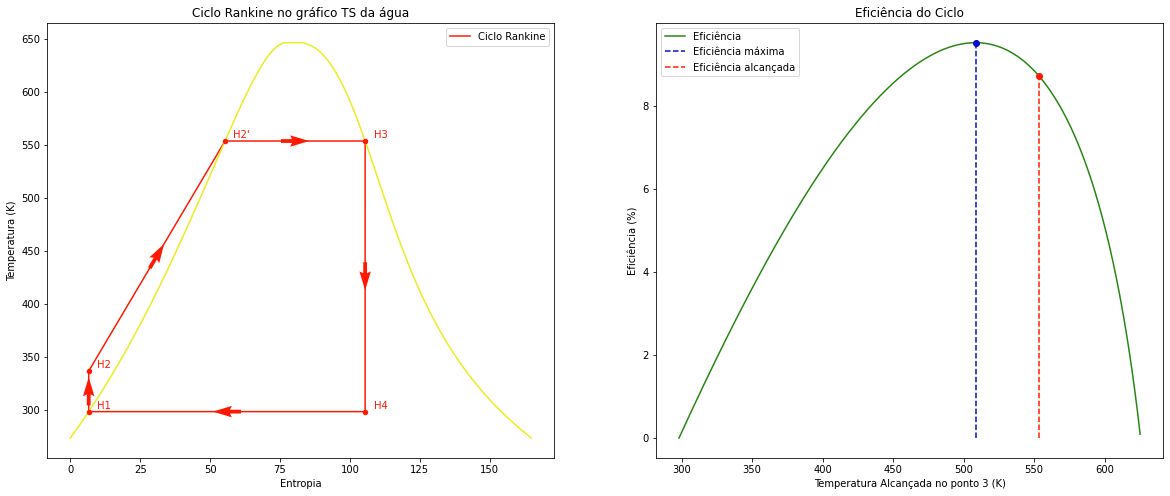

In [7]:
gramas = 100000
composto = 'Acetona'
massa_agua = 5000
temp_inicial = 298.15

temp_alcancada, e_el, e_ev, e_t, el = temp_max(massa_agua, gramas, composto, temp_inicial)

print('Dados:')
print(f'Massa de água = {massa_agua}g')
print(f'Temperatura inicial: {temp_inicial:.2f}K / {temp_inicial - 273.15:.2f}°C')
print(f'Massa do composto = {gramas}g')
print(f'Composto = {composto}')

print()

print('Resultados')
print(f'Temperatura alcançada: {temp_alcancada:.2f}K / {temp_alcancada - 273.15:.2f}°C')
print(f'Energia liberada na combustão: {el:.2f}J / {el / 1000:.2f}kJ')
print(f'Energia necessária para elevar a essa temperatura: {e_el:.2f}J / {e_el / 1000:.2f}kJ')
print(f'Energia necessária para evaporar a água nessa temperatura: {e_ev:.2f}J / {e_ev / 1000:.2f}kJ')
print(f'Energia total: {e_t:.2f}J / {e_t / 1000:.2f}kJ')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

plot_rankine(ax1, temp_inicial, temp_alcancada)
plot_eficiencia(ax2, temp_inicial, temp_alcancada)

<b> </b>

#### <p style='text-align: justify'> Vendo os dois gráficos acima e os valores obtidos pelos nossos cálculos, podemos dizer que a porcentagem de eficiência do ciclo de Rankine para o nosso sistema é de 8,7% </p>

<h2> Considerando o ciclo de Carnot </h2>

<p style='text_align: justify'> Até agora foram trabalhadas as consições de uma máquina térmica considerada sob o ciclo de Rankine ideal. Entretanto, mesmo que estejamos lidando com a idelidade de um sistema como o nosso, o ciclo de Rankine não pode ser completamente ideal, uma vez que ele não é teórico, como é o caso so ciclo de Carnot. Esse tipo de ciclo não é, de forma alguma, utilizável de maneira prática, uma vez que é completamente reversível. Sendo assim, vamos agora considerar o ciclo de Carnot aplicado para o nosso sistema de fluidos. Isso nos permitirá comparar ambos os ciclos. </p>

<p style='text-align: justify'> Da mesma forma que fizemos com Rankine, portanto, precisamos calcular a eficiência do ciclo de Carnot, a qual é . Diferente de Rankine, que usa as entalpias para diferentes estados do sistema, Carnot considera apenas as temperaturas envolvidas no sistema, ou seja, a temperatura em que a água entra no ciclo e a temperatura em que a água entra em ebulição. Por esse motivo ele retorna o rendimento máximo que uma máquina térmica pode ter, bom como por isso que ele é puramente ideal e, consequentemente, teórico. </p>

Assim:

$$\bigg( 1 - \bigg( \frac{T_{fria}}{T_{quente}}\bigg)\bigg)100$$

Em que:

<ul>
    <li> `T_fria`: temperatura em que a água entre no ciclo; </li>
    <li> `T_quente`: temperatura em que a água entra em ebulição. </li>
</ul>

<p style='text-align: justify'> Nesse sentido, a eficiência do ciclo de Carnot é uma medida da capacidade do ciclo em converter calor em trabalho tal que quanto maior a diferença de temperatura entre as fontes quente e fria, maior será a eficiência do ciclo de Carnot. Portanto, criamos uma função chamada `cycle_eff_carnot` que é responsável por calcular a eficiência desse ciclo com base nas duas temperaturas fornecidas. </p>

<p style='text-align: justify'> Pelo cálculo do ciclo resultar em um rendimento máximo da máquina, o valor de eficiência que esperamos receber ao final deve ser maior que o valor de eficiência obtido para o ciclo de Rankine. </p>

In [8]:
# Eficiência do ciclo de Carnot
def cycle_eff_carnot(t_fria, t_quente):
    eficiencia_carnot = (1 - (t_fria / t_quente)) * 100
    return eficiencia_carnot

In [9]:
t_fria = 298.15
t_quente = 508.73

cycle_eff_carnot(t_fria, t_quente)

41.393273445639146

#### Assim, podemos dizer que a porcentagem de eficiência do ciclo de Rankine para o nosso sistema é de 41,3%

<h3> Referências </h3>

[1] - <a href='An Introduction to Thermal Physics by Daniel V. Schroeder (z-lib.org).pdf'> SCHROEDER, Daniel. An Introduction to Thermal Physics. 2000, p 122-137, ISBN 0-201-38027-7. </a>

[2] - <a href='https://webbook.nist.gov/chemistry/name-ser/'> Chemical Name Search. Disponível em: https://webbook.nist.gov/chemistry/name-ser/. </a>

[3] - <a href='https://webbook.nist.gov/chemistry/fluid/'> NATIONAL INSTITUTE OF STANDARDS AND TECHNOLOGY. Thermophysical Properties of Fluid Systems. Disponível em: https://webbook.nist.gov/chemistry/fluid/. </a>

### Comentários Peer-Review:
Em geral, o notebook cumpriu o requisitado pelo Desafio, introduzindo o ciclo de Rankine, discutindo-o teoricamente, utilizando dados tabelados para a água e comparando a eficiência do Ciclo de Rankine com o Ciclo de Carnot. Descrição e discussão ao longo do notebook foram decentemente executadas. Os códigos estão ordenados, documentados e bem organizados. Os gráficos conseguem explicitar claramente os processos que descrevem. O gráfico de eficiência, apesar de ser algo extra, é extremamente interessante de uma perspectiva visual, uma vez que compara as eficiências do ciclo de forma rápida e eficaz. Mesmo assim, alguns aspectos poderiam ser melhor desenvolvidos:

#### O Ciclo de Rankine: 
Não há erros conceituais na explicação introdutória sobre o ciclo. Foi mencionado que o ciclo pode ser reversível ou não, o que está correto.  Os processos que compõem os o ciclo ideal foram descritos corretamente, explicando que a compressão e a expansão são isentrópicas para o ciclo ideal, que considera que a turbina e a bomba não geram entropia. 

Poderia ter discutido mais as suposições do modelo, relacionando com a segunda lei da termodinâmica para explicar o porque do modelo ser uma idealização, já que na realidade há aumento na entropia para todos os processos.

#### Cálculo da temperatura:
A conta está correta, porém faltou desenvolver mais conceitualmente. Por exemplo, da mesma forma como foi explicada a fórmula da eficiência do ciclo, mostrando a expressão em Latex, poderia ter mostrado a integral da temperatura  vezes a capacidade calorífica, usada para calcular a variação de entalpia, além de explicá-la. Ficaria mais claro, ao invés de fazer tudo dentro das funções de python.

#### Eficiência do ciclo de Rankine:
Apesar do objetivo ser usar o ciclo de Rankine ideal, poderiam ter abordado um pouco mais as possibilidades não ideais. Por exemplo discutindo o fato que nem toda variação de entalpia na expansão é convertida em trabalho, por conta da eficiência da própria turbina. A mesma coisa vale para perdas de energia na compressão, e da irreversibilidade de uma bomba real. O ciclo considera a compressão e a expansão como idealmente isentrópicas, mas a discussão poderia ter se perguntado: "E se a turbina e a bomba gerassem entropia para o sistema, como no caso real, como isso afetaria o ciclo?"

#### Mais discussões:
* Relação do Ciclo de Rankine com o ponto crítico da água.
* O por quê de, em geral, se utiliza a água como fluido para o Ciclo de Rankine.
* Aplicações reais para o Ciclo de Rankine.
* Relação da temperatura do boiler e do condensador com o rendimento no ciclo de Rankine (<a href='https://en.wikipedia.org/wiki/Rankine_cycle#The_four_processes_in_the_Rankine_cycle'> Rankine Cycle</a> obedece a <a href='https://en.wikipedia.org/wiki/Carnot%27s_theorem_(thermodynamics)'> Carnot's Theorem</a>).